# LATAM - Challenge Data Engineer

*Autor: Iván Daniel Huerta Herrera*

*Versión: 1.0.1*

### Contexto

Se tiene la información de un conjunto de Tweets (de la red social Twitter) en un archivo de texto plano donde cada línea corresponde a un objeto JSON.

Se nos pide realizar una serie de tareas que serán descritas a continuación.

#### Problema 1

Encontrar las top 10 fechas donde hay más tweets. Mencionar el usuario (username) que más publicaciones tiene por cada uno de esos días.

#### Problema 2

Listar los top 10 emojis más usados con su respectivo conteo.

#### Problema 3

Encontrar el top 10 histórico de usuarios (username) más influyentes en función del conteo de las menciones (@) que registra cada uno de ellos

### Restricciones

Cada problema debe implementar las functiones contenidas en los archivos `q<X>_memory.py` y `q<X>_time.py`, donde `<X>` corresponde al número de pregunta. Estas funciones deben optimizar el uso de memoria o el tiempo de ejecución respectivamente.

## Consideraciones en la solución

Para la optimización de cada uno de los parámetros solicitados se considerará:

 - *Memoria*: El documento se leera en de línea en línea y no completo, y la información agregada se hará de forma directa.
 
 - *Tiempo*: Se utilizará como estrategia usar *MapReduce* con computación distribuida. De manera que las agregaciones se puedan realizar en paralelo. 

**Todo lo ejecutado en este desafío se realizó localmente, se podría con modificaciones menores correr en Databricks**

### Inicialización de recursos importantes

In [1]:
# file_path = "/Volumes/test/default/data/farmers-protest-tweets-2021-2-4.json"

file_path = "farmers-protest-tweets-2021-2-4.json"

mem_usage = {}
time_usage = {}

Se crea una función que utiliza los decoradores para la medición de la memoría y el tiempo para ejecutar la función objetivo

In [2]:
from utils.profilers import mem_profiler2, time_profiler


def run_function(func, tag, file):
    @time_profiler(time_map=time_usage, tag=tag)
    @mem_profiler2(mem_map=mem_usage, tag=tag)
    def wrapper(file):
        if file is None:
            return func()
        else:
            return func(file)

    return wrapper(file)

Antes de ver si se debe hacer o no limpieza de datos se verificará que no existan repetidos, el resto de la información se verificará con los schemas y los parsings que se hacen en los scripts

In [3]:
from utils.pyspark_mng import PySparkManager
from utils.pyspark_schema import tweet_schema


def init():
    with PySparkManager() as spark:
        tweet_df = spark.read.json(file_path, schema=tweet_schema)
        rows = (
            tweet_df.groupBy("id")
            .count()
            .orderBy("count", ascending=False)
            .limit(1)
            .show()
        )
        return spark


spark = run_function(init, "init", None)

your 131072x1 screen size is bogus. expect trouble
25/06/05 20:32:05 WARN Utils: Your hostname, ihuerta resolves to a loopback address: 127.0.1.1; using 10.255.255.254 instead (on interface lo)
25/06/05 20:32:05 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/06/05 20:32:08 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


+-------------------+-----+
|                 id|count|
+-------------------+-----+
|1364486773540331522|    1|
+-------------------+-----+



#### Problema 1

##### Resolución optimizando la memoria RAM

In [ ]:
from q1_memory import q1_memory

run_function(lambda x: print(q1_memory(x)), "q1_memory", file_path)

[(datetime.date(2021, 2, 19), 'Preetm91'), (datetime.date(2021, 2, 18), 'neetuanjle_nitu'), (datetime.date(2021, 2, 17), 'RaaJVinderkaur'), (datetime.date(2021, 2, 13), 'MaanDee08215437'), (datetime.date(2021, 2, 12), 'RanbirS00614606'), (datetime.date(2021, 2, 21), 'Surrypuria'), (datetime.date(2021, 2, 18), 'rebelpacifist'), (datetime.date(2021, 2, 19), 'KaurDosanjh1979'), (datetime.date(2021, 2, 23), 'Surrypuria'), (datetime.date(2021, 2, 15), 'jot__b')]


25/06/05 20:32:21 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


##### Resolución optimizando el tiempo

In [5]:
from q1_time import q1_time

run_function(lambda x: print(q1_time(x)), "q1_time", file_path)

[(datetime.date(2021, 2, 19), 'Preetm91'), (datetime.date(2021, 2, 18), 'neetuanjle_nitu'), (datetime.date(2021, 2, 17), 'RaaJVinderkaur'), (datetime.date(2021, 2, 13), 'MaanDee08215437'), (datetime.date(2021, 2, 12), 'RanbirS00614606'), (datetime.date(2021, 2, 21), 'Surrypuria'), (datetime.date(2021, 2, 18), 'rebelpacifist'), (datetime.date(2021, 2, 19), 'KaurDosanjh1979'), (datetime.date(2021, 2, 23), 'Surrypuria'), (datetime.date(2021, 2, 15), 'jot__b')]


#### Problema 2

##### Resolución optimizando la memoria RAM

In [6]:
from q2_memory import q2_memory

run_function(lambda x: print(q2_memory(x)), "q2_memory", file_path)

[('🙏', 7286), ('😂', 3072), ('🚜', 2972), ('✊', 2411), ('🌾', 2363), ('🏻', 2080), ('❤', 1779), ('🤣', 1668), ('🏽', 1218), ('👇', 1108)]


##### Resolución optimizando el tiempo

In [7]:
from q2_time import q2_time

run_function(lambda x: print(q2_time(x)), "q2_time", file_path)

[('🙏', 7286), ('😂', 3072), ('🚜', 2972), ('✊', 2411), ('🌾', 2363), ('🏻', 2080), ('❤', 1779), ('🤣', 1668), ('🏽', 1218), ('👇', 1108)]


En este problema se tomó en consideración que los emoji se contabilizan sólo en los mensajes del Tweet, y los Tweet relacionados a este no se tomaron en cuenta para evitar duplicar la información en caso de haber referencias múltiples.

Para los Emojis se uso la librería `emoji` indirectamente. Se copió uno de los archivos en utils y se agregó una función para ver si hay Emojis.

#### Problema 3

##### Resolución optimizando la memoria RAM

In [8]:
from q3_memory import q3_memory

run_function(lambda x: print(q3_memory(x)), "q3_memory", file_path)

[('narendramodi', 2265), ('Kisanektamorcha', 1840), ('RakeshTikaitBKU', 1644), ('PMOIndia', 1427), ('RahulGandhi', 1146), ('GretaThunberg', 1048), ('RaviSinghKA', 1019), ('rihanna', 986), ('UNHumanRights', 962), ('meenaharris', 926)]


##### Resolución optimizando el tiempo

In [9]:
from q3_time import q3_time

run_function(lambda x: print(q3_time(x)), "q3_time", file_path)

[('narendramodi', 2265), ('Kisanektamorcha', 1840), ('RakeshTikaitBKU', 1644), ('PMOIndia', 1427), ('RahulGandhi', 1146), ('GretaThunberg', 1048), ('RaviSinghKA', 1019), ('rihanna', 986), ('UNHumanRights', 962), ('meenaharris', 926)]


Para el caso de las menciones, se aprovechó la estructura de datos que Twitter (X) proporciona. De esta manera no se buscó hacer operaciones de búsqueda en el String o con expresiones regulares

#### Análisis de memoria

En el analisis de la memoria se utiliza Memray para revisar la memoria que está el proceso temporalmente. Para simplificar el caso de analisis se realizará sólo con la memoria física (RSS), aunque para un analisis más completo se debería realizar con más tipos.

In [10]:
def plot_mem(q, ax):
    df1 = spark.createDataFrame(
        mem_usage[f"q{q}_memory"], ["timestamp", "physical", "heap"]
    )
    df2 = spark.createDataFrame(
        mem_usage[f"q{q}_time"], ["timestamp", "physical", "heap"]
    )

    # Suppose df1 is a Spark DataFrame with columns: "timestamp", "physical", "heap"
    data1 = df1.select("timestamp", "physical", "heap").collect()
    data2 = df2.select("timestamp", "physical", "heap").collect()

    # Extract columns as Python lists
    timestamps1 = [row["timestamp"] - data1[0]["timestamp"] for row in data1]
    physical1 = [row["physical"] for row in data1]

    timestamps2 = [row["timestamp"] - data2[0]["timestamp"] for row in data2]
    physical2 = [row["physical"] for row in data2]

    ax.plot(timestamps1, physical1, label="Physical Memory (Mem Opt)", color="blue")
    ax.plot(timestamps2, physical2, label="Physical Memory (Time Opt)", color="green")
    ax.set_title(f"Memory Usage Over Time for Q{q}")
    ax.set_xlabel("Timestamp [ms]")
    ax.set_ylabel("Memory Usage (MiB)")
    ax.grid()
    ax.legend()

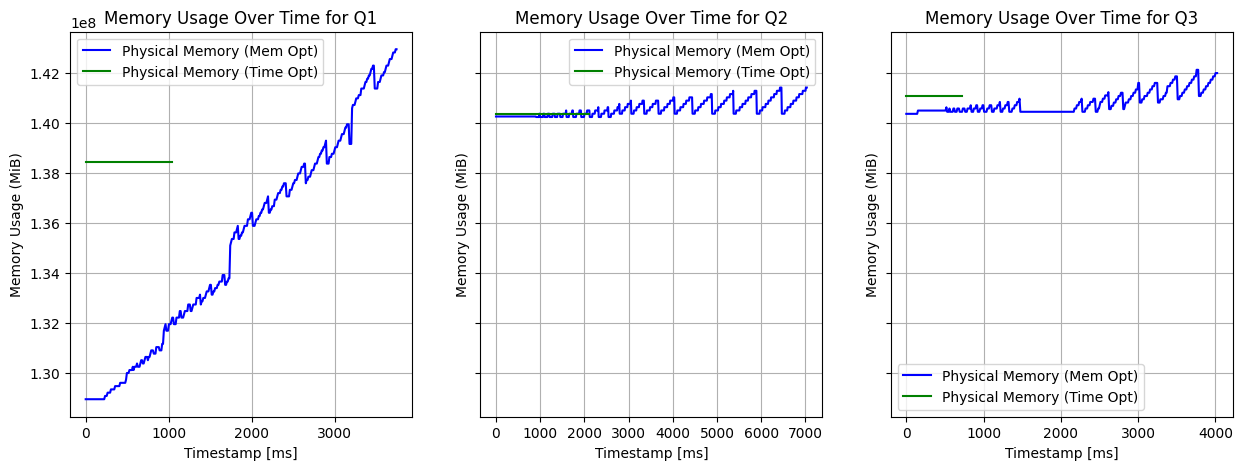

In [11]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
plot_mem(1, axs[0])
plot_mem(2, axs[1])
plot_mem(3, axs[2])

In [12]:
mem_usage["init"][0]  # timestamp, physical, heap

[1749169924279, 125145088, 0]

Para analizar e gráfico es importante notar que 125 MiB estaban antes de la ejecución de PySpark, por lo tanto es la carga en memoria de las librerías solamente. Pero necesitamos saber cuál es la memoria que usa el proceso. Acá no estamos usando clusters, así que pdemos verlo directo del proceso en el sistema operativo

In [13]:
import subprocess

cmd = "top -b -n 1 -p $(ps aux | grep spark | grep LATAM-DE | awk '{print $2}' | head -n 1)"
output = subprocess.check_output(cmd, shell=True, text=True)
print(output)

your 131072x1 screen size is bogus. expect trouble


top - 20:34:11 up 59 min,  1 user,  load average: 0.60, 0.51, 0.38
Tasks:   1 total,   0 running,   1 sleeping,   0 stopped,   0 zombie
%Cpu(s):  4.8 us,  3.6 sy,  0.0 ni, 89.8 id,  0.0 wa,  0.0 hi,  1.8 si,  0.0 st 
MiB Mem :  31722.2 total,  18862.5 free,   8795.4 used,   4467.1 buff/cache     
MiB Swap:   8192.0 total,   8192.0 free,      0.0 used.  22926.8 avail Mem 

    PID USER      PR  NI    VIRT    RES    SHR S  %CPU  %MEM     TIME+ COMMAND
  45959 ihuerta   20   0   10.8g   1.0g  25660 S   0.0   3.2   1:00.84 java



Vamos a asumir que la memoria se mantiene similar, aunque para ser más exhaustivos podríamos: 
- Usar el subproceso que usamos antes y un IOString buffer para conectar al File Descriptor y obtener la data del %MEM
- Usar SparkUI para revisar cuánto usa (opción para la nube)

In [14]:
def plot_mem_corrected(q, ax):
    df1 = spark.createDataFrame(
        mem_usage[f"q{q}_memory"], ["timestamp", "physical", "heap"]
    )
    df2 = spark.createDataFrame(
        mem_usage[f"q{q}_time"], ["timestamp", "physical", "heap"]
    )

    # Suppose df1 is a Spark DataFrame with columns: "timestamp", "physical", "heap"
    data1 = df1.select("timestamp", "physical", "heap").collect()
    data2 = df2.select("timestamp", "physical", "heap").collect()

    # Extract columns as Python lists
    timestamps1 = [row["timestamp"] - data1[0]["timestamp"] for row in data1]
    physical1 = [(row["physical"]) / 1024 / 1024 for row in data1]

    timestamps2 = [row["timestamp"] - data2[0]["timestamp"] for row in data2]
    physical2 = [(row["physical"] / 1024 / 1024) + (3.2 / 100 * 31722) for row in data2]

    ax.plot(timestamps1, physical1, label="Phy Mem (Mem Opt)", color="blue")
    ax.plot(timestamps2, physical2, label="Phy Mem (Time Opt)", color="green")
    ax.set_title(f"Memory Usage Over Time for Q{q}")
    ax.set_xlabel("Timestamp [ms]")
    ax.set_ylabel("Memory Usage (MiB)")
    ax.grid()
    ax.legend()

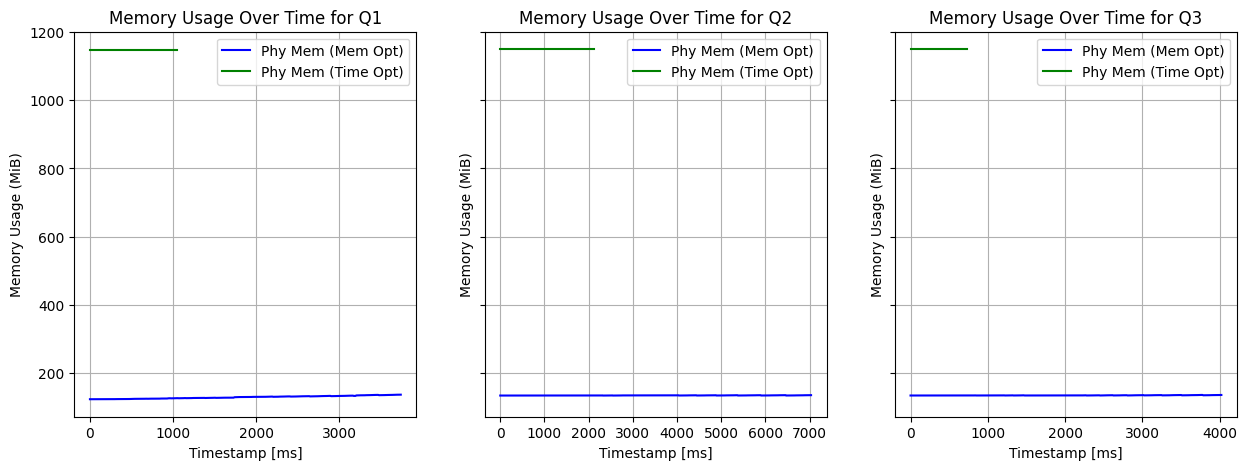

In [15]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
plot_mem_corrected(1, axs[0])
plot_mem_corrected(2, axs[1])
plot_mem_corrected(3, axs[2])

In [ ]:
get_max_memory = lambda x: max([m[1] / 1024 / 1024 for m in mem_usage[x]])
get_min_memory = lambda x: min([m[1] / 1024 / 1024 for m in mem_usage[x]])
get_mem_usage = lambda x, y: (
    get_max_memory(x) - y if y is not None else get_max_memory(x) - get_min_memory(x)
)

spark_mem = 3.2 / 100 * 31722

mem_df = spark.createDataFrame(
    [
        (
            "Init",
            None,
            get_mem_usage("init", 0) + spark_mem,
            get_mem_usage("init", None),
        ),
        (
            "Q1",
            "Memoria",
            get_mem_usage("q1_memory", 0),
            get_mem_usage("q1_memory", None),
        ),
        (
            "Q1",
            "Tiempo",
            get_mem_usage("q1_time", 0) + spark_mem,
            get_mem_usage("q1_time", None),
        ),
        (
            "Q2",
            "Memoria",
            get_mem_usage("q2_memory", 0),
            get_mem_usage("q2_memory", None),
        ),
        (
            "Q2",
            "Tiempo",
            get_mem_usage("q2_time", 0) + spark_mem,
            get_mem_usage("q2_time", None),
        ),
        (
            "Q3",
            "Memoria",
            get_mem_usage("q3_memory", 0),
            get_mem_usage("q3_memory", None),
        ),
        (
            "Q3",
            "Tiempo",
            get_mem_usage("q3_time", 0) + spark_mem,
            get_mem_usage("q3_time", None),
        ),
    ],
    [
        "Etapa",
        "Optimización",
        "Memoria usada [MiB] (Python + PySpark)",
        "Memoria Incremental [MiB] (sólo Python)",
    ],
)

In [17]:
mem_df.toPandas()

,Etapa,Optimización,Memoria usada [MiB] (Python + PySpark),Memoria Incremental [MiB] (sólo Python)
0,Init,None,1136.701656,2.250000
1,Q1,Memoria,136.324219,13.351562
2,Q1,Tiempo,1147.127438,0.000000
3,Q2,Memoria,134.863281,1.125000
4,Q2,Tiempo,1148.963375,0.000000
5,Q3,Memoria,135.539062,1.679688
6,Q3,Tiempo,1149.643063,0.000000


Se podría mejorar este análisis viendo distintos tipos de memoria y revisando por parte cada uno de los pasos realizados. Sin embargo se puede notar que en el caso de la solución para optimizar la memoria, esta crece cada vez más, eso es por el uso de una diccionario (como Hashmap) en el algorítmo.

Otro elemento importante es que se consideró maginal es que en el caso ideal cada uno debería correr en una instancia separada y no dentro del mismo scope de variables.

Los caché de PySpark influyen mucho en la medición de memoria

#### Análisis de tiempo

In [ ]:
import re

pattern = r".*in (\d+\.\d+) seconds"

get_time = lambda x: re.match(pattern, x).groups()[0]
get_arr = lambda x: x.split("\n")[:15]
print_time = lambda x: print(x.split("\n")[:15])


# Helper to get the first line with timing info
def get_first_time_line(arr):
    for line in arr:
        if re.match(pattern, line):
            return line
    return ""


time_dataframe = spark.createDataFrame(
    [["Init", "", get_time(get_first_time_line(get_arr(time_usage["init"])))]],
    ["Instancia", "Optimización", "Tiempo[s]"],
)

add_row = lambda df, q, opt, time: df.union(
    spark.createDataFrame(
        [(f"Q{q}", opt, get_time(get_first_time_line(get_arr(time))))],
        ["Instancia", "Optimización", "Tiempo[s]"],
    )
)

time_dataframe = add_row(time_dataframe, 1, "Memoria", time_usage["q1_memory"])
time_dataframe = add_row(time_dataframe, 1, "Tiempo", time_usage["q1_time"])
time_dataframe = add_row(time_dataframe, 2, "Memoria", time_usage["q2_memory"])
time_dataframe = add_row(time_dataframe, 2, "Tiempo", time_usage["q2_time"])
time_dataframe = add_row(time_dataframe, 3, "Memoria", time_usage["q3_memory"])
time_dataframe = add_row(time_dataframe, 3, "Tiempo", time_usage["q3_time"])

In [19]:
time_dataframe.toPandas()

,Instancia,Optimización,Tiempo[s]
0,Init,,9.901
1,Q1,Memoria,4.030
2,Q1,Tiempo,1.062
3,Q2,Memoria,7.655
4,Q2,Tiempo,2.122
5,Q3,Memoria,6.224
6,Q3,Tiempo,1.466


Si bien la disminución se ve sustancial, mayormente es por la precarga del DataFrame en Spark. Aún así las de tiempo son soluciones escalables que pueden mejorar con la adición de más workers. El tiempo de precarga es de 10 segundos para el caso local.


#### Temas no revisados que si consideraría en un caso real

No se realizó análisis exhaustivo de los datos, ya que la fuente de Twitter es relativamente confiable. Además que en el manejo de errores no tiró problemas.

En un caso real se debería inspeccionar los datos, ver que los formatos sean los correspondientes (como con los esquemas de Spark), intentar repararlos cuando se pueda o eliminar los que puedan sumar complejidad al procesamiento